# Random Forest Classfier

### Import Libraries

In [11]:
import pandas as pd
import numpy  as np

from sklearn import metrics as mt
from sklearn import ensemble as en
from matplotlib import pyplot as plt

### Load Dataset

In [2]:
X_train = pd.read_csv('Training/X_training.csv')
y_train = pd.read_csv('Training/y_training.csv')
X_val = pd.read_csv('Validation/X_validation.csv')
y_val = pd.read_csv('Validation/y_validation.csv')
X_test = pd.read_csv('Test/X_test.csv')
y_test = pd.read_csv('Test/y_test.csv')

In [3]:
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()

### Training

In [7]:
r = np.arange( 2, 41, 1)
acc_list = []
precision_list = []
recall_list = []
f1_list = []
max_acc = 0
max_pre = 0
max_rec = 0
max_f1 = 0

for i in r:

    # model definition
    model = en.RandomForestClassifier(n_estimators=50, max_depth=i)

    # model training
    model.fit(X_train, y_train)

    # model performance
    yhat_train = model.predict( X_train )
    
    # accuracy
    acc = mt.accuracy_score( y_train, yhat_train )
    acc_list.append( acc )
    if acc > max_acc:
        max_acc = acc
    
    # precision
    precision = mt.precision_score( y_train, yhat_train)
    precision_list.append( precision )
    if precision > max_pre:
        max_pre = precision
    
    # recall
    recall = mt.recall_score( y_train, yhat_train)
    recall_list.append( recall )
    if recall > max_rec:
        max_rec = recall
    
    # f1-score
    f1 = mt.f1_score( y_train, yhat_train)
    f1_list.append( f1 )
    if f1 > max_f1:
        max_f1 = f1


print(f'Max Accuracy: {max_acc}')
print(f'Max Precision = {max_pre}')
print(f'Max Recall = {max_rec}')
print(f'Max f1-score = {max_f1}')

Max Accuracy: 1.0
Max Precision = 1.0
Max Recall = 1.0
Max f1-score = 1.0


### Validation

In [5]:
# Best parameters retraining with validation data
r = np.arange( 2, 41, 1)
best_r = acc_list.index( max( acc_list ) )

# model definition
model = en.RandomForestClassifier(n_estimators=50, max_depth=r[best_r])

 # model training
model.fit(X_train, y_train)

# model performance
yhat_val = model.predict( X_val )

# accuracy
acc_val = mt.accuracy_score ( y_val, yhat_val)
print( f'Accuracy = {acc_val}')

# precision
precision_val = mt.precision_score( y_val, yhat_val)
print( f'Precision = {precision_val}')
    
# recall
recall_val = mt.recall_score( y_val, yhat_val)
print( f'Recall = {recall_val}')
    
# f1-score
f1_val = mt.f1_score( y_val, yhat_val)
print( f'F1-score = {f1_val}')

Accuracy = 0.9644776215450948
Precision = 0.9740817421976842
Recall = 0.9431286658252283
F1-score = 0.9583553376084496


### Test

In [6]:
# Best parameters retraining with validation data
best_r = acc_list.index( max( acc_list ) )

# model definition
model = en.RandomForestClassifier(n_estimators=50, max_depth=r[best_r])

 # model training
model.fit(np.concatenate( (X_train, X_val)),
          np.concatenate( (y_train, y_val)))

# model performance
y_pred = model.predict( X_test )

# accuracy
acc_test = mt.accuracy_score ( y_test, y_pred)
print( f'Accuracy = {acc_test}')

# precision
precision_test = mt.precision_score( y_test, y_pred)
print( f'Precision = {precision_test}')
    
# recall
recall_test = mt.recall_score( y_test, y_pred)
print( f'Recall = {recall_test}')
    
# f1-score
f1_test = mt.f1_score( y_test, y_pred)
print( f'F1-score = {f1_test}')

c:\Users\Felipe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy = 0.9644305410728768
Precision = 0.9736078360239434
Recall = 0.9445666520017598
F1-score = 0.9588674020811934


### Features Importances

In [13]:
# which feature has the greatest weight
model.feature_importances_

array([0.03063474, 0.04255872, 0.02583731, 0.09818321, 0.02700638,
       0.13495205, 0.01268096, 0.03681061, 0.0126797 , 0.01093061,
       0.17621875, 0.03402755, 0.05704174, 0.03306755, 0.03627349,
       0.02361803, 0.02283882, 0.021508  , 0.0246642 , 0.00932767,
       0.0112963 , 0.00275702, 0.00274145, 0.04666953, 0.06567559])

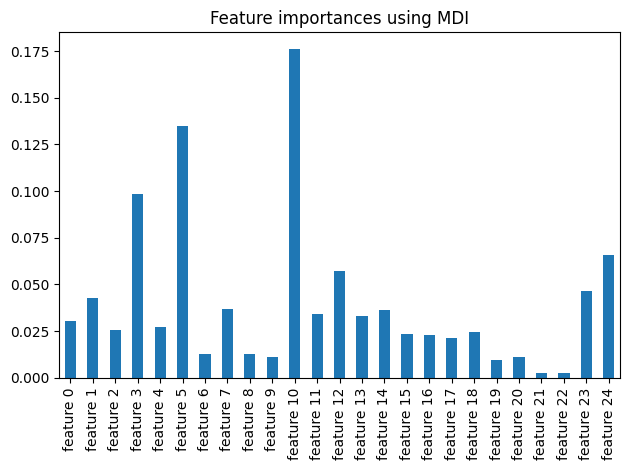

In [14]:
feature_names = [f'feature {i}' for i in range(X_train.shape[1])]
importances = model.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title('Feature importances using MDI')
fig.tight_layout()

#### The most important variables that influence the classification are: <br> - Class (feature 03) <br> - Inflight_wifi_service (feature 05) <br> - Online_boarding (feature 10)